<a href="https://colab.research.google.com/github/choeuneheol/python-practice/blob/master/%EC%BB%B4%ED%93%A8%ED%84%B0%EB%B9%84%EC%A0%840721.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import os
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

# 복습

In [ ]:
#회색이미지로 불러오기
img = cv2.imread('fig/fig/puppy.bmp',0)

if img is None:
    print('image read failed')
    sys.exit()
    
cv2.namedWindow('image')

cv2.imshow('image',img)

while True:
    key = cv2.waitKey()
    if key == 27 or key == ord("q"):
        break
        
cv2.destroyAllWindows()

In [ ]:
#비행기합성하기
dst = cv2.imread('fig/fig/airplane.bmp')
mask = cv2.imread('fig/fig/mask_plane.bmp',0)
src = cv2.imread('fig/fig/field.bmp')

mask_inv = -mask

cv2.copyTo(dst, mask_inv, src)

cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
img = np.full((800,1200,3),255,np.uint8)

cv2.line(img,(50,50),(400,100),(255,0,0),5,cv2.LINE_AA)
cv2.arrowedLine(img,(400,100),(400,300),(0,0,255),5,cv2.LINE_AA)
cv2.rectangle(img,(50,200),(200,400),(255,255,0),-1)
cv2.rectangle(img,(50,200,150,200),(255,255,0),10,cv2.LINE_AA)
text = "Hello Opencv"

cv2.putText(img,text,(100,500),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,2,(0,0,255),4,
            cv2.LINE_AA)

cv2.imshow('image',img)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.8)
fourcc = cv2.VideoWriter_fourcc(*"DIVX")

out = cv2.VideoWriter('review.avi', fourcc = fourcc, fps = fps, frameSize=(w,h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print('GO home!')
        break
        
    edge = cv2.Canny(frame,50,150)
    out.write(frame)
    
    cv2.imshow("frame",frame)
    cv2.imshow('edge',edge)
    
    if cv2.waitKey(30) == 27:
        break
        
out.release()
cap.release()
cv2.destroyAllWindows()

In [ ]:
def call_mouse(event,x,y,flags,param):
    global oldx, oldy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x,y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags == cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img,(oldx,oldy),(x,y),(255,0,255),4,cv2.LINE_AA)
            cv2.imshow('image', img)
            oldx, oldy = x,y
            
img = np.ones((600,1200,3), np.uint8)*255

cv2.imshow('image',img)
cv2.setMouseCallback('image',call_mouse, img)

cv2.waitKey()
cv2.destroyAllWindows()

# 본수업

In [ ]:
def call_trackbar(pos):
    img[:] = pos
    cv2.imshow('image',img)
    
img = np.zeros((480,640),np.uint8)

cv2.namedWindow('image')

cv2.createTrackbar('level','image',0,255,call_trackbar)

cv2.imshow('image',img)

cv2.waitKey()

cv2.destroyAllWindows()

In [ ]:
def call_trackbar(pos):
    global img
    
    img_glass = img*pos
    cv2.imshow('imshow', img_glass)
    
img_alpha = cv2.imread('fig/fig/imgbin_sunglasses_1.png',cv2.IMREAD_UNCHANGED)
img = img_alpha[:,:,-1]
img[img>0] = 1

cv2.namedWindow('image')

cv2.createTrackbar('level','image',0,255,call_trackbar)

cv2.imshow('image',img)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('fig/fig/lenna.bmp')

if img is None:
    print('image read failed')
    sys.exit()
    
# dst = np.olip(imp +100.,0, 255).astype(np.uint8)
dst = cv2.add(img,(100,100,100,0))

cv2.imshow('image',img)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import matplotlib.pylab as pit

In [ ]:
src1 = cv2.imread('fig/fig/lenna256.bmp',0)
h,w = src1.shape[:2]
src2 = np.zeros((h,w),np.uint8)
cv2.circle(src2,(128,128),100,200,-1)
cv2.circle(src2,(128,128),50,50,-1)
cv2.circle(src2,(128,128),20,20,-1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, .5,src2,.5,0)
dst3 = cv2.subtract(src1,src2)
dst4 = cv2.absdiff(src1, src2)

cv2.imshow('src1', src1) 
cv2.imshow('src2', src2)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src1 = np.zeros((256,256), np.uint8)
cv2.rectangle(src1,(10,10),(128,240),255,-1)

src2 = np.zeros((256,256), np.uint8)
cv2.circle(src2,(128,128), 50, 255, -1)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)

cv2.waitKey()
cv2.destroyAllWindows()

(<AxesSubplot:title={'center':'dst_not'}>,
 (-0.5, 255.5, 255.5, -0.5),
 Text(0.5, 1.0, 'dst_not'))

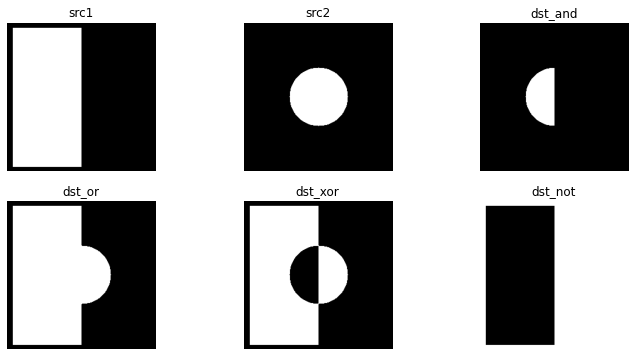

In [ ]:

src1 = np.zeros((256,256), np.uint8)
cv2.rectangle(src1, (10,10), (127,248), 255, -1)

src2 = np.zeros((256,256),np.uint8)
cv2.circle(src2, (128,128),50,255,-1)

dst_and = cv2.bitwise_and(src1, src2)
dst_or = cv2.bitwise_or(src1, src2)
dst_xor = cv2.bitwise_xor(src1, src2)
dst_not = cv2.bitwise_not(src1)

plt.figure(figsize=(12,6))

plt.subplot(231), plt.imshow(src1, cmap='gray'), plt.axis('off'), plt.title('src1')
plt.subplot(232), plt.imshow(src2, cmap='gray'), plt.axis('off'), plt.title('src2')
plt.subplot(233), plt.imshow(dst_and, cmap='gray'), plt.axis('off'), plt.title('dst_and')
plt.subplot(234), plt.imshow(dst_or, cmap='gray'), plt.axis('off'), plt.title('dst_or')
plt.subplot(235), plt.imshow(dst_xor, cmap='gray'), plt.axis('off'), plt.title('dst_xor')
plt.subplot(236), plt.imshow(dst_not, cmap='gray'), plt.axis('off'), plt.title('dst_not')